In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_fum_salary_19-20')

In [3]:
wrs.dtypes

NAME         object
FUM           int64
FUM_rank    float64
salary        int64
dtype: object

In [4]:
wrs.head()

,NAME,FUM,FUM_rank,salary
0,Christian Kirk,0,44.0,1473717
1,Michael Gallup,0,44.0,880995
2,Marquise Brown,0,44.0,2946835
3,Zay Jones,0,44.0,1694958
4,Jamison Crowder,0,44.0,9500000


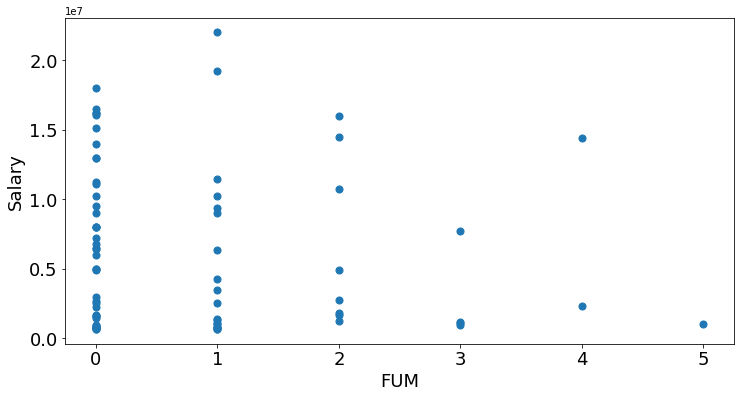

In [5]:
ax = wrs.plot(kind="scatter", x = 'FUM',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUM', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['FUM', 'salary']])

In [7]:
X.mean(axis = 0)

array([-5.84327908e-17,  5.11286919e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.4889867 ,  0.31974101],
       [ 1.79914774, -0.66417546],
       [-0.53889567,  1.76089837],
       [-0.33317009, -0.83275758],
       [ 1.51697009,  1.3428642 ]])

In [11]:
km.predict(X)

array([3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0, 0, 2, 3, 2, 3, 0, 2, 0,
       3, 2, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1], dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,FUM,FUM_rank,salary,clusters
0,Christian Kirk,0,44.0,1473717,3
1,Michael Gallup,0,44.0,880995,3
2,Marquise Brown,0,44.0,2946835,3
3,Zay Jones,0,44.0,1694958,3
4,Jamison Crowder,0,44.0,9500000,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.38095238e-01, 8.06918195e+06],
       [2.81818182e+00, 2.44978355e+06],
       [1.81818182e-01, 1.63000000e+07],
       [4.13793103e-01, 1.48696793e+06],
       [2.50000000e+00, 1.39125000e+07]])

In [14]:
wrs.groupby('clusters')[['FUM', 'salary']].mean()

,FUM,salary
clusters,,
0,0.238095,8.069182e+06
1,2.818182,2.449784e+06
2,0.181818,1.630000e+07
3,0.413793,1.486968e+06
4,2.500000,1.391250e+07


In [15]:
centroids = wrs.groupby('clusters')[['FUM', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

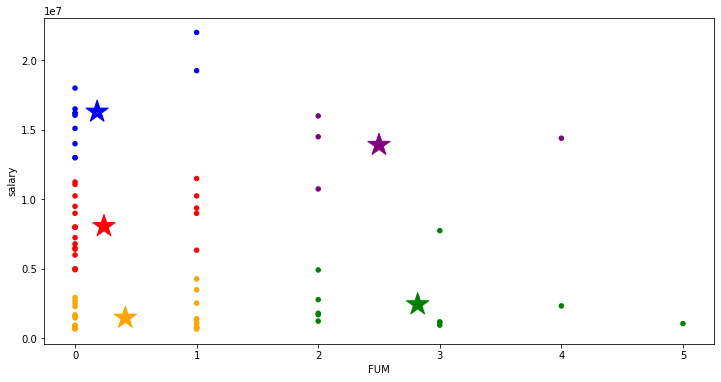

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'FUM', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUM', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

27.32217832603059

In [18]:
silhouette_score(X, km.labels_)

0.4822898937707317